<center><span style="font-size:2em;">Suicide Around the Wrold Over 1985 - 2014</span></center>
<center><span style="font-size:1.5em;">By: Linxi  Liu</span></center>
Lots studies have been done to study about suicide with the expectation to learn what factors typically associate with suicide and people want to predict suicide to prevent the tragedies. In this essay, I studied the suicide data from [Kaggle.com](https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016) and have found three main interesting things: 

1.  How suicide rate diffrent among countires? Which country has the highest suicide rate?
2.  Correlation between gender, age and the number of suicide.

However, always remember that correlation does not necessarily mean a causual effect. 

### First, let's read in and pre-process the data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
from IPython.display import display
!jupyter nbextension enable --py widgetsnbextension
import warnings
warnings.filterwarnings('ignore')
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [2]:
# read in data
data = pd.read_csv('master.csv')
print(data.shape)
data.head()
# add a mean_age column
data.loc['mean_age'] = None
data.loc[data.age == '15-24 years','mean_age'] = np.mean([15,24])
data.loc[data.age == '25-34 years','mean_age'] = np.mean([25,34])
data.loc[data.age == '35-54 years','mean_age'] = np.mean([35,54])
data.loc[data.age == '5-14 years','mean_age'] = np.mean([5,14])
data.loc[data.age == '55-74 years','mean_age'] = np.mean([55,74])
data.loc[data.age == '75+ years','mean_age'] = 75
data = data.dropna()
data.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,mean_age
72,Albania,1995.0,male,25-34 years,13.0,232900.0,5.58,Albania1995,0.619,"2,424,499,009",835.0,Generation X,29.5
73,Albania,1995.0,male,55-74 years,9.0,178000.0,5.06,Albania1995,0.619,"2,424,499,009",835.0,Silent,64.5
74,Albania,1995.0,female,75+ years,2.0,40800.0,4.90,Albania1995,0.619,"2,424,499,009",835.0,G.I. Generation,75.0
75,Albania,1995.0,female,15-24 years,13.0,283500.0,4.59,Albania1995,0.619,"2,424,499,009",835.0,Generation X,19.5
76,Albania,1995.0,male,15-24 years,11.0,241200.0,4.56,Albania1995,0.619,"2,424,499,009",835.0,Generation X,19.5


In [3]:
# !pip install pycountry
import pycountry
country_dict = pd.DataFrame()
for ctry in list(pycountry.countries):
    country_code = ctry.alpha_3
    country_name = ctry.name
    country_dict = pd.concat([country_dict,pd.DataFrame([country_code,country_name]).T])
country_dict.columns = ['country_code','country']
print(country_dict.shape)
# country_dict.head()

(249, 2)


### 1. How suicide rate diffrent among countires? Which country has the highest suicide rate?

In [4]:
# plot on map suicide rate vs. country over time
import ipywidgets # interactivity
country_year_rate = data.groupby(['year','country'])['suicides/100k pop'].sum()
country_year_rate = country_year_rate.unstack().reset_index().melt(id_vars='year')
country_year_rate = country_year_rate.fillna(0)
country_year_rate = country_year_rate.merge(country_dict, on='country',how = 'left')

country_year_count = data.groupby(['year'])['suicides_no'].sum()
country_year_count = country_year_count.fillna(0)
@ipywidgets.interact(Year = np.unique(country_year_rate.year))
def world_map(Year):
    # Year = 1985
    mask = country_year_rate[country_year_rate.year == Year]
    max_value = max(mask.value)
    max_country = mask[mask.value == max(mask.value)]['country'].values[0]
    country_year_rate[country_year_rate.country == max_country]
    init_notebook_mode(connected=True)
    data = [go.Choropleth(
        locations = mask['country_code'],
        z = mask['value'],
        text = mask['country'],
        colorscale = [
            [0, "rgb(110, 11, 24)"],   
            [0.35, "rgb(179, 70, 70)"],
            [0.5, "rgb(190,88,100)"],
            [0.6, "rgb(201, 127,135 )"],
            [0.7, "rgb(212, 166, 170)"],
            [1, "rgb(220, 220, 220)"]
        ],
        autocolorscale = False,
        reversescale = True,
        marker = go.choropleth.Marker(
            line = go.choropleth.marker.Line(
                color = 'rgb(180,180,180)',
                width = 0.5
            )),
        colorbar = go.choropleth.ColorBar(
            title = 'Suicide/100k Pop'),
    )]

    layout = go.Layout(
        title = go.layout.Title(
            text = 'Suicide/100k Pop around World in {} <br> {} has the maximun suicide/100k pop of {} this year'.format(Year.astype(int),max_country,round(max_value,2))
        ),
        geo = go.layout.Geo(
            showframe = False,
            showcoastlines = False,
            projection = go.layout.geo.Projection(
                type = 'equirectangular'
            )
        ),
        annotations = [go.layout.Annotation(
            x = 0.55,
            y = 0.1,
            xref = 'paper',
            yref = 'paper',
            text = 'Total number of suicides around world is {}'.format(country_year_count.loc[Year]),
            showarrow = False
        )] 
    )

    fig = go.Figure(data = data, layout = layout)
    iplot(fig, filename = 'world-map')

interactive(children=(Dropdown(description='Year', options=(1985.0, 1990.0, 1995.0, 2000.0, 2005.0, 2010.0, 20…

This image shows the suicide rate (defined as: total suicide divided by 100k population) around the world. You can choose a year of your interests. The deeper the color, the higher the suicide in that country. Note that the world map is not a complete map as the suicide information in some country, such as China, is not included in the dataset. 

I have observed that Lithuania has the highest suicide rate in many years (e.g. 1995, 2000, and 2005). I have, therefore, did some research online to find possible reasons. It seems suicide in Lithuania is so significant that there is even an [Wikipedia](https://en.wikipedia.org/wiki/Suicide_in_Lithuania) page for this issue. As mentioned by Kasparas Asmonaitis (2017) some researchers point out the fact that although northern countries such as Lithuanina has beautiful nature, the lack of  sunshine and the cold winters make people tend to depress, one of the common signs before suicide. Social and financial problems in Lithuania are also considered  as important reasons factors that lead to high rate of suicides. 

### 2. Correlation between gender, age and the number of suicide

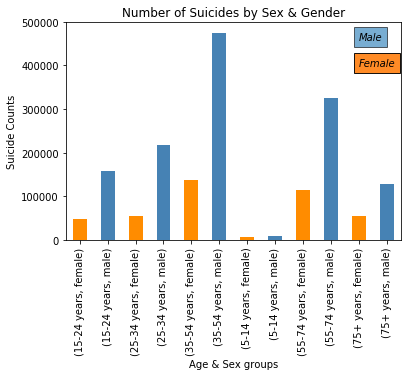

In [5]:
age_sex_count = data.groupby(['age','sex'])['suicides_no'].sum().unstack().reset_index().melt(id_vars='age')
from itertools import islice, cycle
mycolors = list(islice(cycle(['darkorange', 'steelblue']), None, len(age_sex_count)))
age_sex_count = data.groupby(by=['age','sex'])['suicides_no'].sum()
age_sex_count.plot(kind = 'bar',color = mycolors)
plt.title('Number of Suicides by Sex & Gender')
plt.ylabel('Suicide Counts')
plt.xlabel('Age & Sex groups')
plt.text(10, 398870, 'Female', style='italic',
        bbox={'facecolor':'tab:orange', 'alpha': .9, 'pad': 5})
plt.text(10, 458870, 'Male', style='italic',
        bbox={'facecolor':'tab:blue', 'alpha': .6, 'pad': 5})
plt.show()


From the graph above,  we can observe that in any age and gender group, more males tend to kill themselves than females. Also, the suicide counts first increase along with age and reach a peack in the 35-54 age group, and then decrease since then. 

Next I displayed an average age of people committed suicide across years in different countires. You could choose a countrie of your interest.  For example if you want to see how the suicide age in Lithuania compared to other countries, you can specify the countries. 

In [6]:
country_suicide = data.groupby('country')['suicides_no'].sum()
country_suicide = country_suicide.sort_values()
country_suicide.head()

country
Antigua and Barbuda     0.0
Grenada                 3.0
Maldives                4.0
Oman                   20.0
Seychelles             32.0
Name: suicides_no, dtype: float64

In [7]:
# Rolling average age in different countries across years
country_suicide = data.groupby('country')['suicides_no'].sum()
country_suicide = country_suicide.sort_values()

@ipywidgets.interact(country = np.unique(data.country))
def print_name(country):
#     country = 'Japan'

    country_sub = data[data.country == country]
    country_sub['total_age'] = country_sub['mean_age']*country_sub['suicides_no']
    country_sub['total_age'] = country_sub['total_age'].astype(float)
    country_total_age = country_sub.groupby('year')['total_age'].sum()
    country_total_suicide = country_sub.groupby('year')['suicides_no'].sum()
    country_mean_age = country_total_age / country_total_suicide

    # make data look less noisy with rolling averages
    @ipywidgets.interact(Window=(1,len(country_mean_age),1))
    def make_plot(Window):
        avg_age_avg = country_mean_age.rolling(window=Window).mean()
        plt.plot(country_mean_age, marker='.', linewidth=0.5, alpha=1,label = 'average age')
        plt.plot(avg_age_avg, marker='.', linewidth=1.5, label='rolling average age')
        plt.title('Rolling Average Age of Suicides in {} Over Years'.format(country))
        plt.legend()
        plt.xlabel('Year')
        plt.ylabel('Suicide Age')

interactive(children=(Dropdown(description='country', options=('Albania', 'Antigua and Barbuda', 'Argentina', …

It seems the average suicide age in a lot of the countries has an increasing tendency. For example, the average suicide age in Lithuanina has been increasing since 1995 to 2012, although dropped significantly in 2013, but skyrocked again in year 2014. I have  also observed that the average suicide age, around 50 to 55,in many Europe countries  is slightly higher than that in North America, typically between 44 and 50. 

### References:
- Rusty (2018).*Suicide Rates Overview 1985 to 2016 (version1)*. Retrived from: https://www.kaggle.com/russellyates88/suicide-rates-overview-1985-to-2016
- Wikpedia Suicide in Lithuania. Retrived from: https://en.wikipedia.org/wiki/Suicide_in_Lithuania
- Kasparas Asmonaitis (November,2017).*This Country Has Among the Highest Suicide Rates in the World*. Retrived from: https://theculturetrip.com/europe/lithuania/articles/this-country-has-among-the-highest-suicide-rates-in-the-world/